# 05 - Mapping Microcephaly in Brazil

In this notebook I just analyze data from official microcephaly reports and generate a few interactive maps pointing the locations and number of microcephaly cases in the states of Brazil.

The reports were collected from the repository of publicly available Zika data at [Github](https://github.com/cdcepi/zika). They include information about confirmed cases of microcephaly, suspected but discarded cases, and cases currently under investigation. At the time of this analysis, 44 reports were available, representing data collected from February 2016 to December 2016.

In [1]:
# Import required libraries.
library(plyr)
library(dplyr)
library(ggplot2)
library(ggmap)
library(leaflet)
library(htmlwidgets)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## 1 Data load

In [2]:
# Get a list of file names.
filenames <- list.files(path = 'data', pattern = '.csv')
filenames

[1] "COES_Microcephaly-2016-02-13.csv" "COES_Microcephaly-2016-02-20.csv"
 [3] "COES_Microcephaly-2016-02-27.csv" "COES_Microcephaly-2016-03-05.csv"
 [5] "COES_Microcephaly-2016-03-12.csv" "COES_Microcephaly-2016-03-19.csv"
 [7] "COES_Microcephaly-2016-03-26.csv" "COES_Microcephaly-2016-04-02.csv"
 [9] "COES_Microcephaly-2016-04-09.csv" "COES_Microcephaly-2016-04-16.csv"
[11] "COES_Microcephaly-2016-04-23.csv" "COES_Microcephaly-2016-04-30.csv"
[13] "COES_Microcephaly-2016-05-07.csv" "COES_Microcephaly-2016-05-14.csv"
[15] "COES_Microcephaly-2016-05-21.csv" "COES_Microcephaly-2016-05-28.csv"
[17] "COES_Microcephaly-2016-06-04.csv" "COES_Microcephaly-2016-06-11.csv"
[19] "COES_Microcephaly-2016-06-18.csv" "COES_Microcephaly-2016-06-25.csv"
[21] "COES_Microcephaly-2016-07-02.csv" "COES_Microcephaly-2016-07-09.csv"
[23] "COES_Microcephaly-2016-07-16.csv" "COES_Microcephaly-2016-07-23.csv"
[25] "COES_Microcephaly-2016-07-30.csv" "COES_Microcephaly-2016-08-06.csv"
[27] "COES_Microcephaly-2016-08-13.csv" "COES_Microcephaly-2016-08-20.csv"
[29] "COES_Microcephaly-2016-08-27.csv" "COES_Microcephaly-2016-09-03.csv"
[31] "COES_Microcephaly-2016-09-10.csv" "COES_Microcephaly-2016-09-17.csv"
[33] "COES_Microcephaly-2016-09-24.csv" "COES_Microcephaly-2016-10-01.csv"
[35] "COES_Microcephaly-2016-10-08.csv" "COES_Microcephaly-2016-10-15.csv"
[37] "COES_Microcephaly-2016-10-22.csv" "COES_Microcephaly-2016-10-29.csv"
[39] "COES_Microcephaly-2016-11-05.csv" "COES_Microcephaly-2016-11-12.csv"
[41] "COES_Microcephaly-2016-11-19.csv" "COES_Microcephaly-2016-11-26.csv"
[43] "COES_Microcephaly-2016-12-03.csv" "COES_Microcephaly-2016-12-17.csv"

In [3]:
# Load reports into a list.
reports <- lapply(filenames, function (fn) {
    read.csv(paste('data/', fn, sep = ''), stringsAsFactors = FALSE)
})

In [4]:
# Count the reports.
length(reports)

[1] 44

In [5]:
# Show the size of each report.
str(reports, 1)

List of 44
 $ :'data.frame':	139 obs. of  9 variables:
 $ :'data.frame':	180 obs. of  9 variables:
 $ :'data.frame':	180 obs. of  9 variables:
 $ :'data.frame':	189 obs. of  9 variables:
 $ :'data.frame':	195 obs. of  9 variables:
 $ :'data.frame':	195 obs. of  9 variables:
 $ :'data.frame':	195 obs. of  9 variables:
 $ :'data.frame':	195 obs. of  9 variables:
 $ :'data.frame':	195 obs. of  9 variables:
 $ :'data.frame':	198 obs. of  9 variables:
 $ :'data.frame':	198 obs. of  9 variables:
 $ :'data.frame':	198 obs. of  9 variables:
 $ :'data.frame':	135 obs. of  9 variables:
 $ :'data.frame':	201 obs. of  9 variables:
 $ :'data.frame':	201 obs. of  9 variables:
 $ :'data.frame':	207 obs. of  9 variables:
 $ :'data.frame':	210 obs. of  9 variables:
 $ :'data.frame':	210 obs. of  9 variables:
 $ :'data.frame':	210 obs. of  9 variables:
 $ :'data.frame':	210 obs. of  9 variables:
 $ :'data.frame':	216 obs. of  9 variables:
 $ :'data.frame':	216 obs. of  9 variables:
 $ :'data.frame':	216

In [6]:
# Get the field names.
names(reports[[1]])

[1] "report_date"      "location"         "location_type"    "data_field"      
[5] "data_field_code"  "time_period"      "time_period_type" "value"           
[9] "unit"

In [7]:
head(reports[[1]])

report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
2016-02-13,Brazil-Acre,state,microcephaly_under_investigation,BR0001,NA,NA,22,cases
2016-02-13,Brazil-Alagoas,state,microcephaly_under_investigation,BR0001,NA,NA,90,cases
2016-02-13,Brazil-Amapa,state,microcephaly_under_investigation,BR0001,NA,NA,NA,cases
2016-02-13,Brazil-Amazonas,state,microcephaly_under_investigation,BR0001,NA,NA,NA,cases
2016-02-13,Brazil-Bahia,state,microcephaly_under_investigation,BR0001,NA,NA,583,cases
2016-02-13,Brazil-Ceara,state,microcephaly_under_investigation,BR0001,NA,NA,243,cases


In [8]:
tail(reports[[1]])

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
134,2016-02-13,Brazil-Parana,state,microcephaly_fatal_not,BR0007,NA,NA,2,cases
135,2016-02-13,Brazil-Pernambuco,state,microcephaly_fatal_not,BR0007,NA,NA,0,cases
136,2016-02-13,Brazil-Piaui,state,microcephaly_fatal_not,BR0007,NA,NA,3,cases
137,2016-02-13,Brazil-Rio_Grande_do_Norte,state,microcephaly_fatal_not,BR0007,NA,NA,0,cases
138,2016-02-13,Brazil-Sergipe,state,microcephaly_fatal_not,BR0007,NA,NA,0,cases
139,2016-02-13,Brazil-Sao_Paulo,state,microcephaly_fatal_not,BR0007,NA,NA,2,cases


In [9]:
# Merge all reports into a single data frame.
df <- do.call(rbind, reports)

In [10]:
glimpse(df)

Observations: 9,025
Variables: 9
$ report_date      <chr> "2016-02-13", "2016-02-13", "2016-02-13", "2016-02...
$ location         <chr> "Brazil-Acre", "Brazil-Alagoas", "Brazil-Amapa", "...
$ location_type    <chr> "state", "state", "state", "state", "state", "stat...
$ data_field       <chr> "microcephaly_under_investigation", "microcephaly_...
$ data_field_code  <chr> "BR0001", "BR0001", "BR0001", "BR0001", "BR0001", ...
$ time_period      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ time_period_type <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ value            <chr> "22", "90", NA, NA, "583", "243", "6", "58", "72",...
$ unit             <chr> "cases", "cases", "cases", "cases", "cases", "case...


## 2 Data preparation

In [11]:
# Count missing values.
sapply(df, function (x) {
    sum(is.na(x))
})

report_date         location    location_type       data_field 
               0                0                0                0 
 data_field_code      time_period time_period_type            value 
               0             9025             9025              136 
            unit 
               0

The `time_period` and `time_period_type` fields contain no values at all, so they can be completely dropped. `value` shouldn't contain missing values (technically), but the abscence of value in an observation must mean that this field for such observation should actually be filled with a 0.

In [12]:
# Discard the time period fields.
df <- df %>% select(-c(time_period, time_period_type))

In [13]:
# Convert report_date strings to Date objects.
df <- df %>% mutate(report_date = as.Date(report_date))

In [14]:
# Edit locations removing the country prefix.
df <- df %>% mutate(location = gsub('Brazil-', '', location))

In [15]:
# Replace NAs in the value field by '0'.
df <- df %>% mutate(value = ifelse(is.na(value), '0', value))

In [16]:
# Fix some errors in the value field.
df <- df %>% mutate(value = gsub('([[:digit:]]*)[[:punct:]]*[[:digit:]]*', '\\1', value))

In [17]:
# Convert value strings to numbers.
df <- df %>% mutate(value = as.numeric(value))

In [18]:
# Set the states that belong to each region.
centro_oeste <- c('Distrito_Federal', 'Goias', 'Mato_Grosso', 'Mato_Grosso_do_Sul')
nordeste <- c('Alagoas', 'Bahia', 'Ceara', 'Maranhao', 'Paraiba', 'Pernambuco', 'Piaui', 'Rio_Grande_do_Norte', 'Sergipe')
norte <- c('Acre', 'Amapa', 'Amazonas', 'Para', 'Rondonia', 'Roraima', 'Tocantins')
sudeste <- c('Espirito_Santo', 'Minas_Gerais', 'Rio_de_Janeiro', 'Sao_Paulo')
sul <- c('Parana', 'Santa_Catarina', 'Rio_Grande_do_Sul')

In [19]:
# Add a new field to include the region of the state.
df <- df %>% mutate(region = ifelse(location %in% centro_oeste, 'Centro_Oeste',
                                   ifelse(location %in% nordeste, 'Nordeste', 
                                         ifelse(location %in% norte, 'Norte',
                                               ifelse(location %in% sudeste, 'Sudeste',
                                                     ifelse(location %in% sul, 'Sul', NA))))))

In [20]:
# Convert nominal fields to factors.
data_fields <- c('microcephaly_fatal_not',
                 'microcephaly_not',
                 'microcephaly_fatal_under_investigation',
                 'microcephaly_under_investigation',
                 'microcephaly_fatal_confirmed', 
                 'microcephaly_confirmed') 
regions <- c('Norte', 'Nordeste', 'Centro_Oeste', 'Sudeste', 'Sul')

df <- df %>% mutate(location = as.factor(location),
                    location_type = as.factor(location_type),
                    region = factor(region, levels = regions),
                    data_field = factor(data_field, levels = data_fields),
                    data_field_code = as.factor(data_field_code),
                    unit = as.factor(unit))

In [21]:
glimpse(df)

Observations: 9,025
Variables: 8
$ report_date     <date> 2016-02-13, 2016-02-13, 2016-02-13, 2016-02-13, 20...
$ location        <fctr> Acre, Alagoas, Amapa, Amazonas, Bahia, Ceara, Dist...
$ location_type   <fctr> state, state, state, state, state, state, state, s...
$ data_field      <fctr> microcephaly_under_investigation, microcephaly_und...
$ data_field_code <fctr> BR0001, BR0001, BR0001, BR0001, BR0001, BR0001, BR...
$ value           <dbl> 22, 90, 0, 0, 583, 243, 6, 58, 72, 159, 122, 5, 24,...
$ unit            <fctr> cases, cases, cases, cases, cases, cases, cases, c...
$ region          <fctr> Norte, Nordeste, Norte, Norte, Nordeste, Nordeste,...


In [22]:
# Keep only the data about cases.
df <- df %>% filter(unit == 'cases')

In [23]:
dim(df)

[1] 6690    8

The cleaned data set contains 6690 observations and 8 variables, including information about date, location, type of report and number of reports.

## 3 Data visualization

In [24]:
# Get the total reports by state.
df.tmp <- ddply(df, ~ location + region, summarize, value = sum(value))

head(df.tmp)

location,region,value
Acre,Norte,1918
Alagoas,Nordeste,14110
Amapa,Norte,527
Amazonas,Norte,1220
Bahia,Nordeste,53119
Ceara,Nordeste,24250


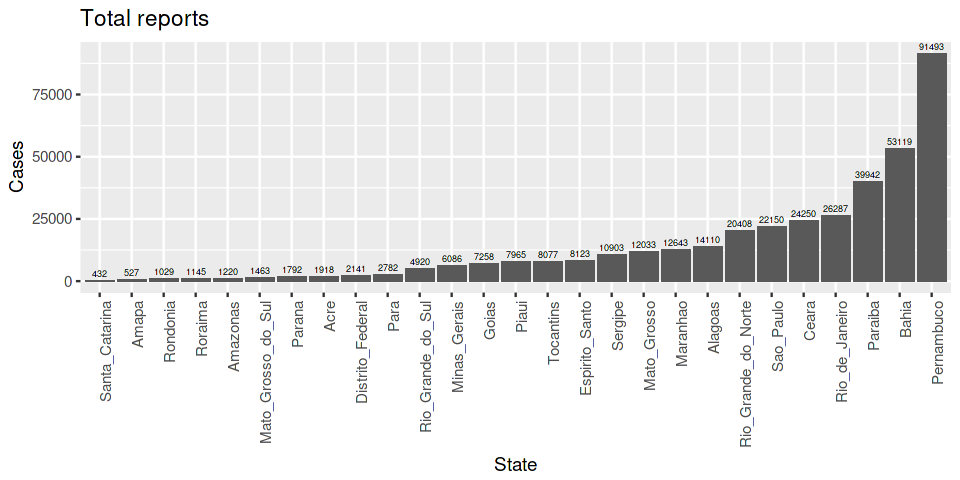

In [25]:
# Plot the total reports by state.
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df.tmp, aes(x = reorder(location, value), y = value)) +
    geom_bar(stat = 'identity') +
    geom_text(aes(label = value), size = 1.8, vjust = -0.5) +
    xlab('State') +
    ylab('Cases') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle('Total reports')

The total reports include both confirmed and discarded cases, as well as and cases still under investigation, so they kinda overestimates the real gravity of the problem. Better filter them data according to what really interest us - the confirmed cases (with and without deaths) and cases still under investigation. Moreover, it seems a good idea to group results by region and plot their evolution through time for better visualization and understanding.

In [26]:
# Get cases in grouped percentages.
df.tmp <- ddply(df, ~ location + data_field, summarize, value = sum(value))
df.tmp <- ddply(df.tmp, ~ location, transform, percent = value / sum(value) * 100)
df.tmp <- ddply(df.tmp, ~ location, transform, percent_confirm = percent)
df.tmp[df.tmp$data_field != 'microcephaly_confirmed', 'percent_confirm'] <- 0

head(df.tmp)

location,data_field,value,percent,percent_confirm
Acre,microcephaly_fatal_not,18,0.9384776,0.000000
Acre,microcephaly_not,951,49.5828989,0.000000
Acre,microcephaly_fatal_under_investigation,50,2.6068822,0.000000
Acre,microcephaly_under_investigation,823,42.9092805,0.000000
Acre,microcephaly_fatal_confirmed,23,1.1991658,0.000000
Acre,microcephaly_confirmed,53,2.7632951,2.763295


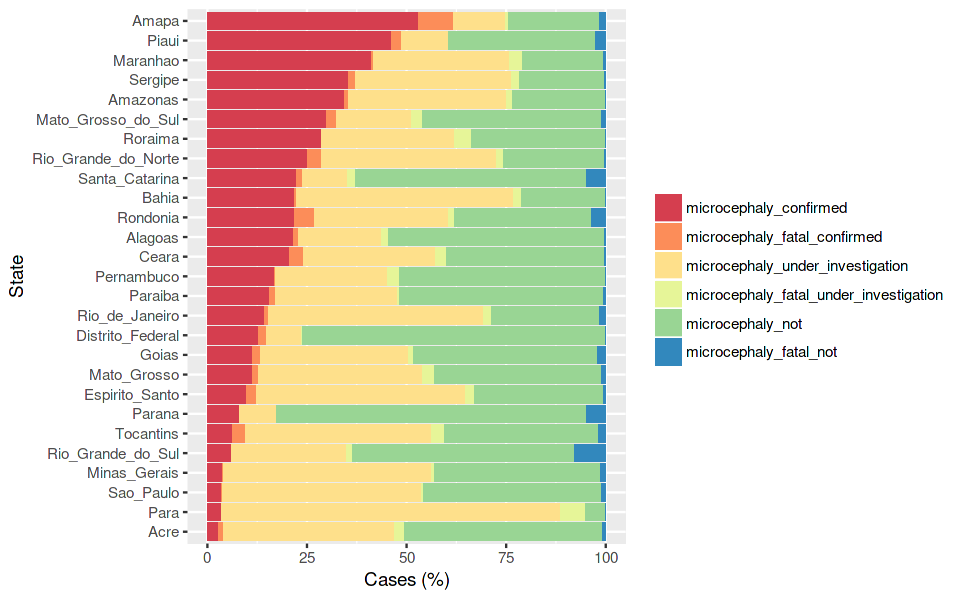

In [27]:
# Plot grouped percentages of cases by state.
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(df.tmp, aes(x = reorder(location, percent_confirm), y = percent, fill = data_field)) +
    geom_bar(stat = 'identity') +
    xlab('State') +
    ylab('Cases (%)') +
    scale_fill_brewer(palette = 'Spectral', direction = -1) +
    guides(fill = guide_legend(reverse = TRUE, title = NULL)) +
    coord_flip()

The 100% stacked bars above shows how the different types of reports are distributed over the states. We can see, for example, that only a few of the reports in the state of São Paulo ended up being confirmed as microcephaly. Actually, most states with a very high number of reports are in similar situation. In contrast, the state of Maranhão is not doing well, since its number of reports is not small and a big part of these reports were actually confirmed as microcephaly cases.

In [28]:
# Get cummulative confirmed cases by state.
df.tmp <- ddply(df, ~ report_date + region + data_field, summarize, value = sum(value))
df.tmp <- df.tmp %>% filter(data_field == 'microcephaly_confirmed')
df.tmp <- df.tmp %>% group_by(region) %>% mutate(cumvalue = cumsum(value))

head(df.tmp)

report_date,region,data_field,value,cumvalue
2016-02-13,Norte,microcephaly_confirmed,1,1
2016-02-13,Nordeste,microcephaly_confirmed,494,494
2016-02-13,Centro_Oeste,microcephaly_confirmed,7,7
2016-02-13,Sudeste,microcephaly_confirmed,5,5
2016-02-13,Sul,microcephaly_confirmed,1,1
2016-02-20,Norte,microcephaly_confirmed,2,3


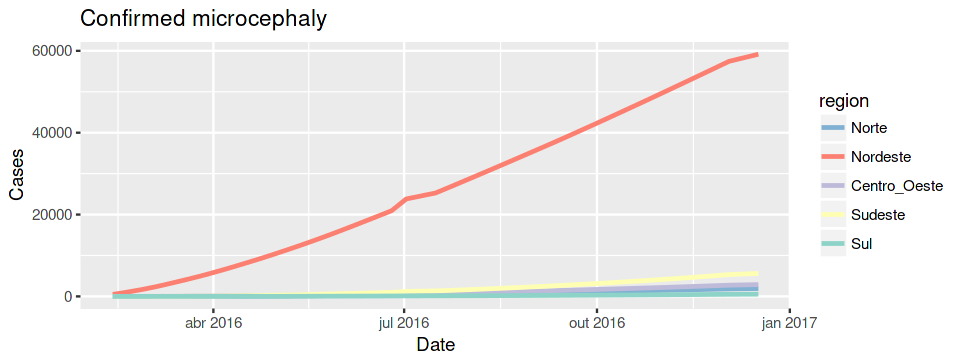

In [29]:
# Plot cummulative confirmed cases by state.
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(df.tmp, aes(x = report_date, y = cumvalue, group = region, colour = region)) +
    geom_line(size = 1) +
    xlab('Date') +
    ylab('Cases') +
    scale_x_date(date_labels = "%b %Y") +
    scale_colour_brewer(palette = 'Set3', direction = -1) +
    ggtitle('Confirmed microcephaly')

The graph above shows the accumulated number of confirmed microcephaly cases over the months in the five regions. There is no doubt that the Northeast region (Nordeste) concentrates the biggest part of the problem, since by December 2016 they have more than 6 times the number of confirmed cases found in the Southeast region (Sudeste). 

But the worst part is: these curves are not giving any clear sign of reduction in their rate of growth.

In [30]:
# Get cummulative confirmed cases with deaths by state.
df.tmp <- ddply(df, ~ report_date + region + data_field, summarize, value = sum(value))
df.tmp <- df.tmp %>% filter(data_field == 'microcephaly_fatal_confirmed')
df.tmp <- df.tmp %>% group_by(region) %>% mutate(cumvalue = cumsum(value))

head(df.tmp)

report_date,region,data_field,value,cumvalue
2016-02-13,Norte,microcephaly_fatal_confirmed,0,0
2016-02-13,Nordeste,microcephaly_fatal_confirmed,27,27
2016-02-13,Centro_Oeste,microcephaly_fatal_confirmed,0,0
2016-02-13,Sudeste,microcephaly_fatal_confirmed,0,0
2016-02-13,Sul,microcephaly_fatal_confirmed,0,0
2016-02-20,Norte,microcephaly_fatal_confirmed,0,0


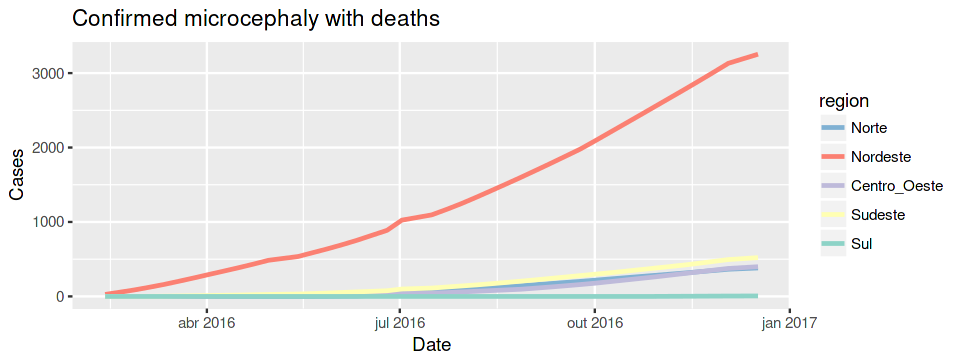

In [31]:
# Plot cummulative confirmed cases with deaths by state.
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(df.tmp, aes(x = report_date, y = cumvalue, group = region, colour = region)) +
    geom_line(size = 1) +
    xlab('Date') +
    ylab('Cases') +
    scale_x_date(date_labels = "%b %Y") +
    scale_colour_brewer(palette = 'Set3', direction = -1) +
    ggtitle('Confirmed microcephaly with deaths')

The lines above show the accumulated number of confirmed microcephaly cases in which the children or fetuses also died. The absolute values are way lower than the those in the previous graph, but there are still an upward trend for all regions except for the South (Sul). Again, the Northeast region is by far in the worst situation, and things don't seem to be getting better.

In [32]:
# Get cummulative count of cases under investigation.
df.tmp <- ddply(df, ~ report_date + region + data_field, summarize, value = sum(value))
df.tmp <- df.tmp %>% filter(data_field == 'microcephaly_under_investigation')
df.tmp <- df.tmp %>% group_by(region) %>% mutate(cumvalue = cumsum(value))

head(df.tmp)

report_date,region,data_field,value,cumvalue
2016-02-13,Norte,microcephaly_under_investigation,129,129
2016-02-13,Nordeste,microcephaly_under_investigation,3180,3180
2016-02-13,Centro_Oeste,microcephaly_under_investigation,205,205
2016-02-13,Sudeste,microcephaly_under_investigation,420,420
2016-02-13,Sul,microcephaly_under_investigation,1,1
2016-02-20,Norte,microcephaly_under_investigation,152,281


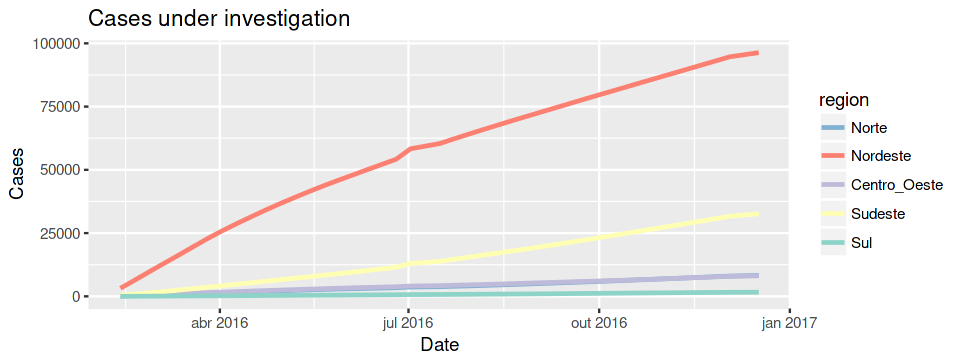

In [33]:
# Plot cummulative confirmed cases with deaths by state.
options(repr.plot.width = 8, repr.plot.height = 3)
ggplot(df.tmp, aes(x = report_date, y = cumvalue, group = region, colour = region)) +
    geom_line(size = 1) +
    xlab('Date') +
    ylab('Cases') +
    scale_x_date(date_labels = "%b %Y") +
    scale_colour_brewer(palette = 'Set3', direction = -1) +
    ggtitle('Cases under investigation')

This last graph shows the growth of the number of cases under investigation over the months. Here we have the largest counts, and they're also still growing with no sign of slowdown.

## 4 Geographical mapping

In [34]:
# Get the geolocations of all states using the Google Maps API.
longlat <- geocode(levels(df$location)) %>% mutate(loc = unique(df$location)) 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Acre&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Alagoas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Amapa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Amazonas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bahia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ceara&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Distrito_Federal&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espirito_Santo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Goias&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maran

In [35]:
# Join the geolocations with the accumulated numbers of confirmed microcephaly cases by state.
df.geo <- df %>%
          filter(data_field == 'microcephaly_confirmed') %>%
          group_by(location) %>%
          summarize(cases = sum(value)) %>%
          inner_join(longlat, by = c('location' = 'loc')) %>%
          mutate(LatLon = paste(lat, lon, sep = ':'))

head(df.geo)

location,cases,lon,lat,LatLon
Acre,53,-70.81200,-9.0237964,-9.0237964:-70.8119953
Alagoas,3066,-36.78195,-9.5713058,-9.5713058:-36.7819505
Amapa,279,-52.00296,0.9019925,0.9019925:-52.0029565
Amazonas,419,-65.85606,-3.4168427,-3.4168427:-65.8560646
Bahia,11660,-41.70073,-12.5797380,-12.579738:-41.7007272
Ceara,5002,-39.32062,-5.4983977,-5.4983977:-39.3206241


In [36]:
# Replicate rows so that each case is taken as an observation in the data set.
num_repeated_pts <- df.geo$cases
df.geo_long <- df.geo[rep(1:nrow(df.geo), num_repeated_pts), ]

head(df.geo_long)

location,cases,lon,lat,LatLon
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953
Acre,53,-70.812,-9.023796,-9.0237964:-70.8119953


In [37]:
# Generate the interactive map using Google Maps.
m <- leaflet(df.geo_long) %>%
     addTiles() %>% 
     addMarkers(clusterOptions = markerClusterOptions())

Assuming 'lon' and 'lat' are longitude and latitude, respectively


In [38]:
# Save the map in a webpage.
saveWidget(m, file = 'microcephaly_confirmed_map.html')

Using the Google Maps API we can find the geolocation (latitude, longitude) of all states based solely on their names. After adding this information to a data frame and reshaping data the right way, it is extremely easy to generate an interactive map using the `leaflet` package. Unfortunately there is no way to show the results right here in the notebook, so the map was saved into an external HTML page.

Just to finish, let's generate another map with data about the cases still under investigation.

In [39]:
# Join the geolocations with the accumulated numbers of confirmed microcephaly cases by state.
df.geo <- df %>%
          filter(data_field == 'microcephaly_under_investigation') %>%
          group_by(location) %>%
          summarize(cases = sum(value)) %>%
          inner_join(longlat, by = c('location' = 'loc')) %>%
          mutate(LatLon = paste(lat, lon, sep = ':'))

num_repeated_pts <- df.geo$cases
df.geo_long <- df.geo[rep(1:nrow(df.geo), num_repeated_pts), ]

m <- leaflet(df.geo_long) %>%
     addTiles() %>% 
     addMarkers(clusterOptions = markerClusterOptions())

saveWidget(m, file = 'microcephaly_under_investigation_map.html')

Assuming 'lon' and 'lat' are longitude and latitude, respectively


You can check out the results in the two HTML pages found in the same directory as this notebook. You need JavaScript to interact with the maps.